In [12]:
from sklearn.datasets import load_boston
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt 

data = load_boston()
y = pd.Series(data.target)
X = pd.DataFrame(data.data,columns=data.feature_names)
df = X.copy() 
df['target'] = y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)
T = pca.transform(df)

In [0]:
from sklearn import preprocessing
import math

def scaleFeaturesDF(df):
    # Feature scaling is a type of transformation that only changes the
    # scale, but not number of features. Because of this, we can still
    # use the original dataset's column names... so long as we keep in
    # mind that the _units_ have been altered:

    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    
    print("New Variances:\n", scaled.var())
    print("New Describe:\n", scaled.describe())
    return scaled


def drawVectors(transformed_features, components_, columns):
    num_columns = len(columns)

    # This funtion will project your *original* feature (columns)
    # onto your principal component feature-space, so that you can
    # visualize how "important" each one was in the
    # multi-dimensional scaling

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ## visualize projections

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

    fig, ax = plt.subplots(figsize=(6,4))
    fig.set

    for i in range(num_columns):
        # Use an arrow to project each original feature as a
        # labeled vector on your principal component axes
        ax.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        ax.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

In [38]:
drawVectors(T, pca.components_, df.columns.values)

Features by importance:
 [(345.3564573871383, 'TAX'), (287.09329256725124, 'B'), (29.594399064678385, 'AGE'), (16.079108762229293, 'RAD'), (15.413211937423073, 'ZN'), (10.518492972996775, 'CRIM'), (10.105244356517973, 'INDUS'), (9.354788288548134, 'target'), (8.27476626891888, 'LSTAT'), (2.3198225928019567, 'DIS'), (2.1022466348256077, 'PTRATIO'), (0.4258651725223973, 'RM'), (0.15888594595630215, 'NOX'), (0.03501509264152611, 'CHAS')]


ValueError: ignored

<Figure size 432x288 with 1 Axes>

<BarContainer object of 14 artists>

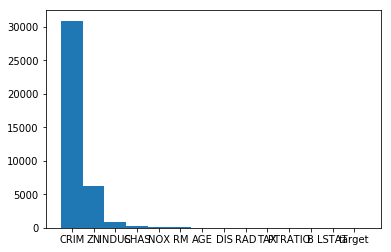

In [47]:
plt.bar(df.columns,height=pca.explained_variance_,width=1)

<BarContainer object of 14 artists>

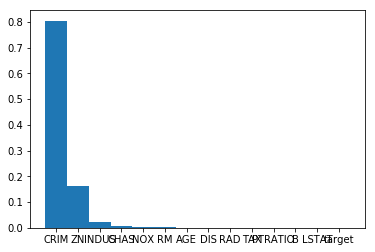

In [48]:
plt.bar(df.columns,height=pca.explained_variance_ratio_,width=1)

In [49]:
pca2 = PCA()
pca2.fit(scaleFeaturesDF(df))

New Variances:
 CRIM       1.00198
ZN         1.00198
INDUS      1.00198
CHAS       1.00198
NOX        1.00198
RM         1.00198
AGE        1.00198
DIS        1.00198
RAD        1.00198
TAX        1.00198
PTRATIO    1.00198
B          1.00198
LSTAT      1.00198
target     1.00198
dtype: float64
New Describe:
                CRIM            ZN  ...         LSTAT        target
count  5.060000e+02  5.060000e+02  ...  5.060000e+02  5.060000e+02
mean  -8.513173e-17  3.306534e-16  ... -1.595123e-16 -4.247810e-16
std    1.000990e+00  1.000990e+00  ...  1.000990e+00  1.000990e+00
min   -4.197819e-01 -4.877224e-01  ... -1.531127e+00 -1.908226e+00
25%   -4.109696e-01 -4.877224e-01  ... -7.994200e-01 -5.994557e-01
50%   -3.906665e-01 -4.877224e-01  ... -1.812536e-01 -1.450593e-01
75%    7.396560e-03  4.877224e-02  ...  6.030188e-01  2.685231e-01
max    9.933931e+00  3.804234e+00  ...  3.548771e+00  2.989460e+00

[8 rows x 14 columns]


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<BarContainer object of 14 artists>

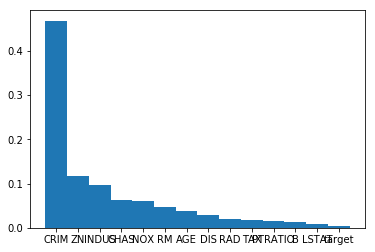

In [52]:
plt.bar(df.columns,height=pca2.explained_variance_ratio_,width=1)